<a href="https://colab.research.google.com/github/hichanmedia/tiscon9/blob/main/3_4_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#テンプレート画像を用いる方法の検証

*   「template」フォルダを作成し、そこに保存されている画像データを読み込む
*   入力画像は「path」フォルダにある


### ライブラリのインストール

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 画像の読み込みや保存に必要なライブラリが無ければインストール
!pip install opencv-python-headless

### 円検出とラベリング

In [ ]:
def detect_circles(image):
    # グレースケールに変換
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 画像の平滑化
    gray = cv2.medianBlur(gray, 5)

    # Hough Circle Transformで円を検出
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=15, maxRadius=100)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        return circles[0, :]  # 円の情報を返す (x, y, 半径)
    else:
        return None

def label_circles(image, circles):
    output = image.copy()
    for i, circle in enumerate(circles):
        x, y, r = circle
        # 円を描画
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        # ラベリング (番号をつける)
        cv2.putText(output, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    return output


### 画像を読み込み、テンプレートを作成

In [ ]:
from google.colab import drive

template_features = []

# Google ドライブをマウント
drive.mount('/content/drive')

# 画像が保存されているフォルダ
image_folder = "/content/drive/My Drive/template/"

# 処理する画像の拡張子リスト
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# 各画像に対して円を検出し、その情報をテンプレートとして保存
for image_file in os.listdir(image_folder):
    # 画像ファイルの拡張子をチェック
    if os.path.splitext(image_file)[1].lower() in valid_extensions:
        image_path = os.path.join(image_folder, image_file)

        # 画像を読み込み
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to load {image_file}")
            continue

        # 円検出
        circles = detect_circles(image)

        if circles is not None:
            # 各画像の円情報とファイル名を保存 (ファイル名と位置と半径)
            template_features.append({"file_name": image_file, "circles": circles})
            print(f"Circles detected and saved for {image_file}")
        else:
            print(f"No circles found in {image_file}")
    else:
        print(f"Skipping non-image file: {image_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Circles detected and saved for スライド8.JPG
Circles detected and saved for スライド10.JPG
Circles detected and saved for スライド1.JPG
Circles detected and saved for スライド3.JPG
Circles detected and saved for スライド5.JPG
Circles detected and saved for スライド6.JPG
Circles detected and saved for スライド7.JPG
Circles detected and saved for スライド2.JPG
Circles detected and saved for スライド4.JPG
Circles detected and saved for スライド15.JPG
Circles detected and saved for スライド9.JPG
Circles detected and saved for スライド11.JPG
Circles detected and saved for スライド18.JPG
Circles detected and saved for スライド12.JPG
Circles detected and saved for スライド14.JPG
Circles detected and saved for スライド13.JPG
Circles detected and saved for スライド17.JPG
Circles detected and saved for スライド19.JPG
Circles detected and saved for スライド16.JPG
Circles detected and saved for スライド20.JPG
Circles detected and

In [ ]:
# テンプレート情報を確認
for template in template_features:
    print(f"Template from {template['file_name']} contains circles: {template['circles']}")


Template from スライド8.JPG contains circles: [[ 772  283   38]
 [ 868  499   34]
 [ 754  596   43]
 [ 524  596   43]
 [ 868  596   42]
 [ 635  497   34]
 [ 639  596   43]
 [ 413  596   42]
 [ 986  319   28]
 [ 423   79   33]
 [ 310  319   27]
 [ 719  106   32]
 [ 537  268   28]
 [ 411  495   32]
 [  94  445   32]
 [1205  415   32]
 [ 883  563   78]
 [ 787  497   62]
 [ 783  253   41]]
Template from スライド10.JPG contains circles: [[ 868  499   34]
 [ 754  596   43]
 [ 524  596   43]
 [ 868  596   42]
 [ 635  497   34]
 [ 639  596   43]
 [ 413  596   42]
 [ 950  329   28]
 [ 434  305   38]
 [ 421   76   34]
 [ 719  106   32]
 [ 411  495   32]
 [ 703  307   28]
 [ 283  495   28]
 [  94  445   32]
 [1205  415   32]
 [ 883  563   78]
 [ 343  495   58]
 [ 883  427   81]
 [ 787  497   62]]
Template from スライド1.JPG contains circles: [[ 257  485   38]
 [ 754  596   43]
 [ 640  488   33]
 [ 524  596   43]
 [ 868  596   42]
 [ 443  347   38]
 [ 639  596   43]
 [1217  502   34]
 [ 413  596   42]
 [ 8

### 入力画像を与えてパターンを判定

In [ ]:
import numpy as np
import cv2

def calculate_nearest_circles(input_circles, template_circles):
    matched_circles = []
    used_template_indices = set()

    for ic in input_circles:
        ix, iy, ir = ic

        # 初期化：最近傍の円とその距離を設定
        closest_circle = None
        closest_distance = float('inf')

        # テンプレートの円と比較
        for j, tc in enumerate(template_circles):
            if j in used_template_indices:
                continue

            tx, ty, tr = tc

            # オーバーフローを避けるため、型を確認・キャスト
            try:
                distance = np.linalg.norm([float(ix) - float(tx), float(iy) - float(ty)])
            except OverflowError:
                distance = float('inf')  # オーバーフローの場合、大きな距離を設定

            # 最も近い円を見つける
            if distance < closest_distance:
                closest_distance = distance
                closest_circle = (tx, ty, tr)
                closest_index = j

        if closest_circle is not None:
            matched_circles.append((ic, closest_circle))
            used_template_indices.add(closest_index)

    return matched_circles

def calculate_total_score(matched_circles):
    total_score = 0

    # Noneがないかチェックし、スコアを計算
    for ic, tc in matched_circles:
        if tc is None:
            continue

        ix, iy, ir = ic
        tx, ty, tr = tc
        try:
            total_score += np.linalg.norm([float(ix) - float(tx), float(iy) - float(ty)])
        except OverflowError:
            total_score += float('inf')  # オーバーフロー時は大きなスコアを加算

    return total_score

In [ ]:
def draw_circles_with_lines(input_image, template_image, matched_circles):
    # 入力画像とテンプレート画像に円を描画し、対応する円を線で結ぶ
    input_image_copy = input_image.copy()
    template_image_copy = template_image.copy()

    for ic, tc in matched_circles:
        ix, iy, ir = map(int, ic)  # 入力画像の円
        tx, ty, tr = map(int, tc)  # テンプレート画像の円

        # 入力画像に円を描画（青色）
        cv2.circle(input_image_copy, (ix, iy), ir, (255, 0, 0), 2)

        # テンプレート画像に円を描画（緑色）
        cv2.circle(template_image_copy, (tx, ty), tr, (0, 255, 0), 2)

        # 入力画像とテンプレート画像の円の中心を線で結ぶ（赤色）
        cv2.line(input_image_copy, (ix, iy), (tx, ty), (0, 0, 255), 2)

    return input_image_copy, template_image_copy

In [ ]:
def display_images_with_circles_and_lines(input_image, template_image, matched_circles):
    # 円と対応する線を描画
    input_image_with_circles, template_image_with_circles = draw_circles_with_lines(
        input_image, template_image, matched_circles)

    # 2つの画像を並べて表示
    plt.figure(figsize=(10, 5))

    # 入力画像を表示
    plt.subplot(1, 2, 1)
    input_image_rgb = cv2.cvtColor(input_image_with_circles, cv2.COLOR_BGR2RGB)
    plt.imshow(input_image_rgb)
    plt.title("Input Image with Circles")

    # テンプレート画像を表示
    plt.subplot(1, 2, 2)
    template_image_rgb = cv2.cvtColor(template_image_with_circles, cv2.COLOR_BGR2RGB)
    plt.imshow(template_image_rgb)
    plt.title("Template Image with Circles")

    # 画像を表示
    plt.show()

<ipython-input-17-ad73200e9b8e>:20: RuntimeWarning: overflow encountered in scalar subtract
  total_score += np.linalg.norm([ic[0] - tc[0], ic[1] - tc[1]])


Best matching template: スライド4.JPG with score 158411.27329805124


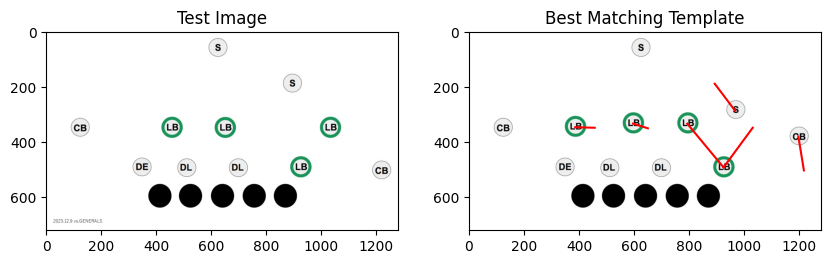

In [ ]:
# 円検出関数やテンプレートの初期化などは省略
input_image = cv2.imread("/content/drive/My Drive/path/スライド10.JPG")
input_circles = detect_circles(input_image)

best_score = float('inf')
best_template = None
best_template_image = None

for template in template_features:
    template_circles = template['circles']
    template_file_name = template['file_name']

    matched_circles = calculate_nearest_circles(input_circles, template_circles)

    total_score = 0
    for ic, tc in matched_circles:
        # 異常値をスキップするチェックを追加
        if not (np.isfinite(ic[0]) and np.isfinite(tc[0]) and np.isfinite(ic[1]) and np.isfinite(tc[1])):
            continue
        total_score += np.linalg.norm([ic[0] - tc[0], ic[1] - tc[1]])

    if total_score < best_score:
        best_score = total_score
        best_template = template
        best_template_image_path = os.path.join(image_folder, template_file_name)
        best_template_image = cv2.imread(best_template_image_path)

if best_template is not None:
    print(f"Best matching template: {best_template['file_name']} with score {best_score}")
    matched_circles = calculate_nearest_circles(input_circles, best_template['circles'])

    # 画像と円の描画関数
    def display_images_with_circles_and_lines(input_image, template_image, matched_circles):
        plt.figure(figsize=(10, 5))

        # 入力画像を表示
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.title('Test Image')

        # テンプレート画像を表示
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
        plt.title('Best Matching Template')

        # マッチングした円の線を描画（必要に応じてカスタマイズ）
        for ic, tc in matched_circles:
            plt.plot([ic[0], tc[0]], [ic[1], tc[1]], 'r-')

        plt.show()

    display_images_with_circles_and_lines(input_image, best_template_image, matched_circles)
else:
    print("No matching template found.")